In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [1]:
# Datos de entrada
y1 = float(input("Posición inicial 1: "))
z1 = float(input("Velocidad inicial 1: "))
y2 = float(input("Posición inicial 2: "))
z2 = float(input("Velocidad inicial 2: "))

Posición inicial 1: .5
Velocidad inicial 1: .2
Posición inicial 2: 0.1
Velocidad inicial 2: 0.3


In [2]:
m1 = 1.0
m2 = 2.0
l1 = 1.0
l2 = 1.0
g = 9.81
h = 0.1
t=0

In [3]:
Y1 = [y1]
Z1 = [z1]
Y2 = [y2]
Z2 = [z2]
T = [t]

In [8]:
def g1(y1,z1,y2,z2):
    return (-g*(2*m1+m2)*np.sin(y1)-m2*g*np.sin(y1-2*y2)-2*np.sin(y1-y2)*m2*((z2**2)*l2+(z1**2)*l1*np.cos(y1-y2)))/(l1*(2*m1+m2-m2*np.cos(2*y1-2*y2)))
def g2(y1,z1,y2,z2):
    return (2*np.sin(y1-y2)*(z1**2*l1*(m1+m2)+g*(m1+m2)*np.cos(y1)+z2**2*l2*m2*np.cos(y1-y2)))/(l2*(2*m1+m2-m2*np.cos(2*y1-2*y2)))

In [9]:
for i in range(0,100):
    k1 = h*z1
    d1 = h*g1(y1,z1,y2,z2)
    k2 = h*(z1+d1/2)
    d2 = h*g1(y1+k1/2,z1+d1/2,y2,z2)
    k3 = h*(z1+d2/2)
    d3 = h*g1(y1+k2/2,z1+d2/2,y2,z2)
    k4 = h*(z1+d3)
    d4 = h*g1(y1+k3,z1+d3,y2,z2)
    
    p1 = h*z2
    q1 = h*g2(y1,z1,y2,z2)
    p2 = h*(z2+p1/2)
    q2 = h*g2(y1,z1,y2+p1/2,z2+q1/2)
    p3 = h*(z2+q2/2)
    q3 = h*g2(y1,z1,y2+p2/2,z2+q2/2)
    p4 = h*(z2+q3)
    q4 = h*g2(y1,z1,y2+p3,z2+q3)
    
    y1 = y1 + (k1+2*k2+2*k3+k4)/6
    z1 = z1 + (d1+2*d2+2*d3+d4)/6
    y2 = y2 + (p1+2*p2+2*p3+p4)/6
    z2 = z2 + (q1+2*q2+2*q3+q4)/6
    t = t+h
    Y1.append(y1)
    Z1.append(z1)
    Y2.append(y2)
    Z2.append(z2)
    T.append(t)

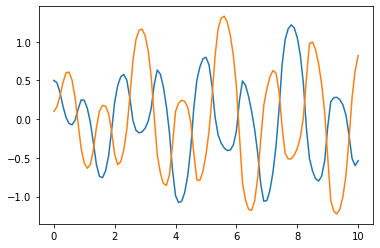

In [10]:
%matplotlib inline
plt.plot(T,Y1,T,Y2)
plt.show()

In [11]:
%matplotlib auto

Using matplotlib backend: Qt5Agg


In [12]:
# Figura sobre la que se basa la animación
fig = plt.figure()
ax=fig.gca()

def actualizar(i):
    ax.clear()
    plt.plot([0,l1*np.sin(Y1[i])],[0,-l1*np.cos(Y1[i])],'k')
    plt.plot([l1*np.sin(Y1[i]),l1*np.sin(Y1[i])+l2*np.sin(Y2[i])],[-l1*np.cos(Y1[i]),-l1*np.cos(Y1[i])-l2*np.cos(Y2[i])],'k')
    plt.plot(l1*np.sin(Y1[i]),-l1*np.cos(Y1[i]),'ro')
    plt.plot(l1*np.sin(Y1[i])+l2*np.sin(Y2[i]),-l1*np.cos(Y1[i])-l2*np.cos(Y2[i]),'bo')
    plt.title(str(round(T[i],3)))
    plt.xlim(-l1-l2,l1+l2)
    plt.ylim(-l1-l2,0)
ani=animation.FuncAnimation(fig,actualizar,range(len(T)))
plt.show()

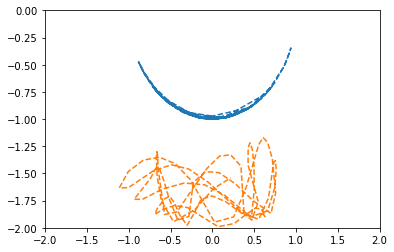

In [20]:
# Trayectoria de la animación
%matplotlib inline
fig = plt.figure()
ax=fig.gca()

# plt.plot([0,l1*np.sin(Y1[i])],[0,-l1*np.cos(Y1[i])],'k')
# plt.plot([l1*np.sin(Y1[i]),l1*np.sin(Y1[i])+l2*np.sin(Y2[i])],[-l1*np.cos(Y1[i]),-l1*np.cos(Y1[i])-l2*np.cos(Y2[i])],'k')
plt.plot(l1*np.sin(Y1),-l1*np.cos(Y1),'--')
plt.plot(l1*np.sin(Y1)+l2*np.sin(Y2),-l1*np.cos(Y1)-l2*np.cos(Y2),'--')
plt.xlim(-l1-l2,l1+l2)
plt.ylim(-l1-l2,0)
plt.show()